# from eqtmZscore to withExpressionData

In [48]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
DATA_FOLDER = '/home/shuang/projects/development_eqtm/data'
EQTM_DATADIR = os.path.join(DATA_FOLDER,'eqtmZscores')
INPUT_FOLDER = os.path.join(EQTM_DATADIR,'ORIGIN')
filenames = ['2017-12-09-eQTLsFDR-et0.0-flipped.txt',
              '2017-12-09-eQTLsFDR-gt0.0-flipped.txt',
              'random20k_gt0.5_withTss.txt']
OUTPUT_FOLDER = os.path.join(EQTM_DATADIR,'withExpressionData')
print(os.listdir(INPUT_FOLDER))

# expression data
expression_filepath = os.path.join(DATA_FOLDER,'features','meanVar','expression-MeanAndVarianceRows.txt')

['bonder-eQTMsFDR0.0-CpGLevel-split.txt', 'fdr_gt0.2_sm0.3.txt', 'random20000-eQTLsFDR-gt0.05-flipped.txt', '2017-12-09-eQTLsFDR-et0.0-flipped.txtsplit.txt', 'random20k_gt0.5.txt', 'random20k_gt0.05_sm0.1.txt', 'random20k_gt0.1_sm0.2.txt', 'random20k_gt0.3_sm0.4.txt', '2017-12-09-eQTLsFDR-et0.0-flipped.txt', 'random20k_gt0.2_sm0.3.txt', '2017-12-09-eQTLsFDR-gt0.05-flipped.txt', 'westra-eQTMsFDR0.0-CpGLevel-split.txt', 'fdr_gt0.5.txt', 'random20k_gt0.4_sm0.5.txt', 'fdr_gt0.4_sm0.5.txt', '2017-12-09-eQTLsFDR-gt0.0-flipped.txtsplit.txt', 'random20k_gt0.5_withZscore.txt', 'random20k_gt0.5_withTss.txt', 'fdr_gt0.3_sm0.4.txt', 'zScoresBonderFinalUnique.csv', 'fdr_gt0.1_sm0.2.txt', 'selectAccordingFDR.sh', 'bonder-eQTMsFDR0.0-CpGLevel-split-uniqueCGs.txt', 'zScoresWestraFinalUnique.csv', 'westra-eQTMsFDR0.0-CpGLevel-split-uniqueCGs.txt', 'fdr_gt0.05_sm0.1.txt', '2017-12-09-eQTLsFDR-gt0.0-flipped.txt']


In [11]:
# read expression data
expression_data = pd.read_csv(expression_filepath,sep='\t')
print(expression_data.shape,'\n',expression_data.head())
expression_dict = expression_data[['ID','Mean','Var']].set_index('ID').T.to_dict('list')
# print(expression_dict)

(19960, 4) 
                 ID     N      Mean           Var
0  ENSG00000180008  2905 -3.547676  48060.577013
1  ENSG00000167693  2905  6.642518  47299.021217
2  ENSG00000064703  2905  5.160337  48509.749511
3  ENSG00000189292  2905 -2.695654  48425.761353
4  ENSG00000243772  2905 -2.186263  48663.139410


In [14]:
# do the same thing for files in filenames1 and filenames2
for filename in filenames1:
    print(filename)
    eqtm_name = '.'.join(filename.split('.')[:-2])
    input_filepath = os.path.join(INPUT_FOLDER_1,filename)
    eqtm = pd.read_csv(input_filepath,sep='\t',index_col=0)
    eqtm['expressionMean'] = [expression_dict[key][0] for key in eqtm['ProbeName'].values]
    eqtm['expressionVar'] = [expression_dict[key][1] for key in eqtm['ProbeName'].values]
    eqtm_savepath = os.path.join(OUTPUT_FOLDER,eqtm_name+'_withExpression.txt')
    eqtm.to_csv(eqtm_savepath)
    print('Saved to :',eqtm_savepath)

for filename in filenames2:
    print(filename)
    eqtm_name = '.'.join(filename.split('.')[:-1])
    print(eqtm_name)
    input_filepath = os.path.join(INPUT_FOLDER_2,filename)
    eqtm = pd.read_csv(input_filepath,sep=',',index_col=0)
    eqtm['expressionMean'] = [expression_dict[key][0] for key in eqtm['ProbeName'].values]
    eqtm['expressionVar'] = [expression_dict[key][1] for key in eqtm['ProbeName'].values]
    eqtm_savepath = os.path.join(OUTPUT_FOLDER,eqtm_name+'_withExpression.txt')
    eqtm.to_csv(eqtm_savepath)
    print('Saved to :',eqtm_savepath)
  

2017-12-09-eQTLsFDR-et0.0-flipped.txt
Saved to : /home/shuang/projects/boxy_eqtm/data/eqtmZscores/withExpressionData/2017-12-09-eQTLsFDR-et0_withExpression.txt
2017-12-09-eQTLsFDR-gt0.0-flipped.txt
Saved to : /home/shuang/projects/boxy_eqtm/data/eqtmZscores/withExpressionData/2017-12-09-eQTLsFDR-gt0_withExpression.txt
random20k_gt0.5_withTss.txt
random20k_gt0.5_withTss
Saved to : /home/shuang/projects/boxy_eqtm/data/eqtmZscores/withExpressionData/random20k_gt0.5_withTss_withExpression.txt


# from withExpressionData to withExpressionTSS

In [15]:
withExpressionDir = os.path.join(EQTM_DATADIR,'withExpressionData')
withExpressionTSSDir = os.path.join(EQTM_DATADIR,'withExpressionTSS')
tss_path = '/home/shuang/projects/boxy_eqtm/data/features/TSSDistance/Homo_sapiens.GRCh37.71.gtf'

In [20]:
def read_tss(tss_path):
    # read tss file from tss_path
    colnames = ['chr','regionFunction','regionType','startSite',
                'endSite','score','strand','sthunknown','geneInfo']
    dtype = {'chr':object,'regionFunction':object,'regionType':object,
             'startSite':int,'endSite':int,'score':object,
             'strand':object,'sthunknown':object,'geneInfo':object}
    tss_raw = pd.read_csv(tss_path,sep='\t',header=None,names=colnames,dtype=dtype)
    return tss_raw

def addTssDistance2eQTMwithZscoreFile(eQTM_path,tss_raw,save_path = None):
    '''
    add TssDistance to eqtmZscore file
    INPUT:
        eQTM_path, string, path to eqtmZscore file
        tss_path, string, path to TssSite file
        save_path, string, path to save the new eqtmZscore_withTSSDistance file
    OUTPUT:
        eQTMs, pandas dataframe
    '''
    

    # reading the eQTMs
    eQTMs = pd.read_csv(eQTM_path,sep=',')

    # extract gene name from geneInfo for tss file
    def findGeneName(item):
        item = [thing for thing in list(filter(None,item.strip().split(";")))][0]
        name = item.replace('"','').replace(';','').strip().split(' ')[1]
        return name
    tss_raw['geneName'] = tss_raw['geneInfo'].apply(findGeneName)

    # find the tss sites for each gene in the tss file
    groupbyTss = tss_raw.groupby('geneName').agg({
        'chr':lambda x: x.unique(),
        'startSite':np.min,
        'endSite':np.max,
        'strand':lambda x: x.unique()
    })
    def findTssSite(series):
        if series[3] == '-':
            return series[2]
        else:
            return series[1]
    groupbyTss['TssSite'] = groupbyTss.apply(findTssSite,axis=1)

    # add tss sites and tss distance to the eqtm file
    def mapSite(row):
        return groupbyTss.loc[row]['TssSite']
    def calculateDis(row):
        return abs(row[0]-row[1])
    def findChr(row):
        return groupbyTss.loc[row]['chr']
    def checkChr(row):
        if str(row[0])==str(row[1]):
            return True
        else:
            return False
    eQTMs['TssSite'] = eQTMs['ProbeName'].apply(mapSite)
    eQTMs['chr'] = eQTMs['ProbeName'].apply(findChr)
    eQTMs['TssDistance'] = eQTMs[['SNPChrPos','TssSite']].apply(calculateDis,axis=1)
    eQTMs['checkChr'] = eQTMs[['chr','SNPChr']].apply(checkChr,axis=1)
    # check whether they are from the same chromosome
    assert len(eQTMs['checkChr'].unique()) == 1

    if save_path:
        # save the eQTM file
        eQTMs.to_csv(save_path,index=False)
        print('Saved eQTM file to: ',save_path)

    return eQTMs

In [22]:
tss_raw = read_tss(tss_path)
print('TSS file loaded.')
for filename in os.listdir(withExpressionDir):
    eqtm_name = '.'.join(filename.split('.')[:-1])
    eQTM_path = os.path.join(withExpressionDir,filename)
    save_path = os.path.join(withExpressionTSSDir,eqtm_name+'Tss.txt')
    _ = addTssDistance2eQTMwithZscoreFile(eQTM_path,tss_raw,save_path = save_path)

TSS file loaded.
Saved eQTM file to:  /home/shuang/projects/boxy_eqtm/data/eqtmZscores/withExpressionTSS/2017-12-09-eQTLsFDR-gt0_withExpressionTss.txt
Saved eQTM file to:  /home/shuang/projects/boxy_eqtm/data/eqtmZscores/withExpressionTSS/random20k_gt0.5_withTss_withExpressionTss.txt
Saved eQTM file to:  /home/shuang/projects/boxy_eqtm/data/eqtmZscores/withExpressionTSS/2017-12-09-eQTLsFDR-et0_withExpressionTss.txt


# from withExpressionTss to withExpressionTssMethy

In [45]:
withExpressionTssMethyDir = os.path.join(EQTM_DATADIR,'withExpressionTSSMethy')
methy_filepath = '/home/shuang/projects/boxy_eqtm/data/features/meanVar/methylation-MeanAndVarianceRows.txt'

In [41]:
def read_methy(methy_filepath):
    methy = pd.read_csv(methy_filepath,sep='\t')
    methy_dict = methy[['ID','Mean','Var']].set_index('ID').T.to_dict('list')
    return methy_dict
def add_Methy(input_filepath,methy_dict,output_filepath):
    inputfile = pd.read_csv(input_filepath,sep=',',index_col=0)
    inputfile['SNPName_ProbeName'] = ['{}_{}'.format(row[0],row[1]) 
                                      for row in inputfile[['SNPName','ProbeName']].values]
    inputfile['methyMean'] = [methy_dict[row][0] for row in inputfile['SNPName'].values]
    inputfile['methyVar'] = [methy_dict[row][1] for row in inputfile['SNPName'].values]
    inputfile.to_csv(output_filepath)
    print('Saved file to:',output_filepath)
    return inputfile

In [47]:
# methy = read_methy(methy_filepath)
print("Methylation file loaded.")
for filename in os.listdir(withExpressionTSSDir):
    filepath = os.path.join(withExpressionTSSDir,filename)
    eqtm_name = '.'.join(filename.split('.')[:-1])
    save_path = os.path.join(withExpressionTssMethyDir,eqtm_name+'Methy.txt')
    _ = add_Methy(filepath,methy,save_path)

Methylation file loaded.
Saved file to: /home/shuang/projects/boxy_eqtm/data/eqtmZscores/withExpressionTSSMethy/2017-12-09-eQTLsFDR-et0_withExpressionTssMethy.txt
Saved file to: /home/shuang/projects/boxy_eqtm/data/eqtmZscores/withExpressionTSSMethy/2017-12-09-eQTLsFDR-gt0_withExpressionTssMethy.txt
Saved file to: /home/shuang/projects/boxy_eqtm/data/eqtmZscores/withExpressionTSSMethy/random20k_gt0.5_withTss_withExpressionTssMethy.txt


# add overlapRatio to eqtm files

In [3]:
eqtm_withTSSExpressionMethy_dir = os.path.join(EQTM_DATADIR,'withExpressionTSSMethy')
eqtm_overlapRatio_dir = os.path.join(DATA_FOLDER,'dataReadyForModeling','overlapRatioTssMeanVar')
eqtm_overlap_withTSSExpressionMethy = os.path.join(EQTM_DATADIR,'final')
et_overlap_name = '2017-12-09-eQTLsFDR-et0.0-flipped_overlapRatio.txt'
et_eqtm_name = '2017-12-09-eQTLsFDR-et0_withExpressionTssMethy.txt'
gt_overlap_name = '2017-12-09-eQTLsFDR-gt0.0-flipped_overlapRatio.txt'
gt_eqtm_name = '2017-12-09-eQTLsFDR-gt0_withExpressionTssMethy.txt'
random_overlap_name = 'random20k_gt0.5_overlapRatio.txt'
random_eqtm_name = 'random20k_gt0.5_withTss_withExpressionTssMethy.txt'

In [30]:
def add_overlap_to_eqtm(eqtm_filename, overlap_filename):
    overlap_filepath = os.path.join(eqtm_overlapRatio_dir,overlap_filename)
    overlap = pd.read_csv(overlap_filepath,sep='\t',index_col=0)
    
    eqtm_filepath = os.path.join(eqtm_withTSSExpressionMethy_dir,eqtm_filename)
    eqtm = pd.read_csv(eqtm_filepath,index_col=0)
#     print(eqtm.head())
#     print(overlap.head())
    overlap_dict = overlap.T.to_dict()
    for col in overlap.columns:
        eqtm[col] = [overlap_dict[row][col] for row in eqtm['SNPName'].values]
    eqtm.to_csv(os.path.join(eqtm_overlap_withTSSExpressionMethy,
                             '.'.join(eqtm_filename.split('.')[:-1])+'Overlap.txt'))
    return eqtm
    

In [31]:
_ = add_overlap_to_eqtm(et_eqtm_name,et_overlap_name)
_ = add_overlap_to_eqtm(gt_eqtm_name,gt_overlap_name)
_ = add_overlap_to_eqtm(random_eqtm_name,random_overlap_name)

# concate all files together and save in final folder as multi_class.txt

In [20]:
final = '/home/shuang/projects/development_eqtm/data/eqtmZscores/final'
multi_class_savepath = os.path.join(final,'multi_class.txt')
print(os.listdir(final))
multi_class = []
def addLabel(row):
    if row>0:
        return 1
    if row<0:
        return 0
for filename in os.listdir(final):
    filepath = os.path.join(final,filename)
    if '2017-12-09-eQTLsFDR-et0_withExpressionTssMethyOverlap' in filename or '2017-12-09-eQTLsFDR-gt0_withExpressionTssMethyOverlap' in filename:
        filecontent = pd.read_csv(filepath)
        filecontent['label'] = [addLabel(i) for i in filecontent['OverallZScore'].values]
    elif 'random20k_gt0.5_withTss_withExpressionTssMethyOverlap.txt' in filename:
        filecontent = pd.read_csv(filepath)
        filecontent['label'] = 3
    else:
        continue
    multi_class.append(filecontent)
multi_class_pd = pd.concat(multi_class)
multi_class_pd.head()
multi_class_pd.to_csv(multi_class_savepath)

['multi_class.txt', '2017-12-09-eQTLsFDR-et0_withExpressionTssMethyOverlap.txt', '2017-12-09-eQTLsFDR-gt0_withExpressionTssMethyOverlap.txt', 'random20k_gt0.5_withTss_withExpressionTssMethyOverlap.txt']


# model

In [1]:
import __init__path
import numpy as np
import pandas as pd
import pickle
import os
from lib.read.read_data import load_data
from lib.read.dataset_class import dataset
from lib.model.modelBuild import convModelObject
from math import copysign

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix


def examineModel(model_name,trainPath,testPath,label_name='OverallZScore',savefilename=None,
                 keep=[],exclude=[],display=True):
    res = {'sensitivity':[],'specificity':[],'auc':[]}
    res2 = {'sensitivity':[],'specificity':[],'auc':[]}
    for i in range(4):
        data = load_data(trainPath,label_name=label_name,keep=keep,exclude=exclude)
        features_to_use = [col for col in data.train.values.columns if col not in keep]
        train_data = dataset(data.train.values[features_to_use],data.train.labels.astype('int8'))
        valid_data = dataset(data.test.values[features_to_use],data.test.labels.astype('int8'))

        model = choose_model(model_name,len(features_to_use))
        print(model.pipeline, model.param_grid)
        model.savefilename = savefilename

        sensitivity,specificity,auc = \
        model.train_and_display_output(train_data=train_data,
                                 valid_data=valid_data,
                                 returnRes=True,
                                 display=display)
        res['sensitivity'].append(sensitivity)
        res['specificity'].append(specificity)
        res['auc'].append(auc)
        if trainPath != testPath:
            test_data = load_data(testPath,keep=keep,
                                  exclude=exclude,test_size=1).test
            sensitivity2,specificity2,auc2 = \
            model.calculate_output(model.classifier,test_data)
            print('>>> test on another dataset: sensitivity: '+
            '{:.{prec}}\tspecificity: {:.{prec}f}\tauc:{}'.\
                  format(sensitivity2,specificity2,auc2,prec=3))
            res2['sensitivity'].append(sensitivity2)
            res2['specificity'].append(specificity2)
            res2['auc'].append(auc2)
    print('Sensitivity:',
    np.mean(np.array(res['sensitivity'])),
    np.std(np.array(res['sensitivity'])),
    np.mean(np.array(res2['sensitivity'])),
    np.std(np.array(res2['sensitivity'])))
    print('Specificity:',
    np.mean(np.array(res['specificity'])),
    np.std(np.array(res['specificity'])),
    np.mean(np.array(res2['specificity'])),
    np.std(np.array(res2['specificity'])))
    print('AUC:',
    np.mean(np.array(res['auc'])),
    np.std(np.array(res['auc'])),
    np.mean(np.array(res2['auc'])),
    np.std(np.array(res2['auc'])))

def compare_Tss_meanVar_exclude(filepath,testpath):
    exclude1 = ['cpgName','cpgName_split','TSS_Distance','methyMean','methyVar']
    exclude2 = ['cpgName','cpgName_split','methyMean','methyVar']
    exclude3 = ['cpgName','cpgName_split','TSS_Distance','methyVar']
    exclude4 = ['cpgName','cpgName_split','TSS_Distance','methyMean']
    exclude5 = ['cpgName','cpgName_split','methyMean']
    exclude6 = ['cpgName','cpgName_split','methyVar']
    exclude7 = ['cpgName','cpgName_split','TSS_Distance']
    exclude8 = ['cpgName','cpgName_split']

    # only check dataset with TSS and dataset with TSS & meanVariance
    for exclude in [exclude2,exclude8]:
        print('Not using features:',exclude)
        modelPerformance(filepath,testpath,exclude=exclude)

def choose_model(model_name,num_features):
    if model_name=='ranfor':
        pipeline = Pipeline(steps=[('pca',PCA()),('ranfor',
                                           RandomForestClassifier())])
        n_estimators = [10,50,100]
        class_weight = ['balanced',{1:4,0:1},{1:2,0:1}]
        n_components = np.arange(2,num_features,int(num_features/5))
        param_grid = [{'pca__n_components':n_components,
                       'ranfor__n_estimators':n_estimators,
                       'ranfor__class_weight':class_weight}]
    elif model_name=='knn':
        pipeline = Pipeline(steps=[('kneighbor',
                                    KNeighborsClassifier())])
        # train the model!
        n_neighbors = range(2,10,2)
        weights = ['uniform','distance']
        param_grid = [{'kneighbor__n_neighbors':n_neighbors,
                       'kneighbor__weights':weights}]
    model = convModelObject(name='model_name',
                      pipeline=pipeline,
                      param_grid=param_grid)
    return model

# test binary classification model

In [50]:
PROJECT_DIR = '/home/shuang/projects/boxy_eqtm'
data_folder = os.path.join(PROJECT_DIR,'data',
                           'eqtmZscores','final')
et_filepath = os.path.join(data_folder,'2017-12-09-eQTLsFDR-et0_withExpressionTssMethyOverlap.txt')
gt_filepath = os.path.join(data_folder,'2017-12-09-eQTLsFDR-gt0_withExpressionTssMethyOverlap.txt')
random_filepath = os.path.join(data_folder,'random20k_gt0.5_withTss_withExpressionTssMethyOverlap.txt')

model_name = 'ranfor'
trainPath = et_filepath
testPath = et_filepath
exclude = ['SNPName','SNPChr','PValue','SNPChrPos','ProbeName','ProbeChr','ProbeCenterChrPos', 
           'CisTrans', 'SNPType', 'AlleleAssessed','DatasetsWhereSNPProbePairIsAvailableAndPassesQC',
           'DatasetsZScores', 'DatasetsNrSamples','IncludedDatasetsMeanProbeExpression',
           'IncludedDatasetsProbeExpressionVariance', 'HGNCName',
           'IncludedDatasetsCorrelationCoefficient', 'Meta-Beta (SE)', 'Beta (SE)',
           'FoldChange', 'FDR','checkChr','SNPName_ProbeName']
keep = ['OverallZScore']

for filepath in [et_filepath,et_filepath,random_filepath]:
    examineModel(model_name,filepath,filepath,keep=keep,exclude=exclude,display=True)

Raw data loaded with shape: (7497, 62)
Data Normalized.
Check the null values:
Here are columns with NaN values:
Check the loaded dataset: 
 train with shape (5622, 39)
test with shape: (1875, 39)
Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('ranfor', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
      ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]) [{'pca__n_components': array([ 2,  9, 16, 23, 30, 37]), 'ranfor__n_estimators': [10, 50, 100], 'ranfor__class_weight': ['balanced', {1: 4, 0: 1}, {1: 2, 0: 1}]}]
Start training...
Model Description:
 Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=23, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('ranfor'

/home/shuang/.pyenv/versions/3.6.3/envs/py3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/shuang/.pyenv/versions/3.6.3/envs/py3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shuang/.pyenv/versions/3.6.3/envs/py3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/shuang/.pyenv/versions/3.6.3/envs/py3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/shuang/.pyenv/versions/3.6.3/envs/py3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Raw data loaded with shape: (7497, 62)
Data Normalized.
Check the null values:
Here are columns with NaN values:
Check the loaded dataset: 
 train with shape (5622, 39)
test with shape: (1875, 39)
Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('ranfor', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
      ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]) [{'pca__n_components': array([ 2,  9, 16, 23, 30, 37]), 'ranfor__n_estimators': [10, 50, 100], 'ranfor__class_weight': ['balanced', {1: 4, 0: 1}, {1: 2, 0: 1}]}]
Start training...


KeyboardInterrupt: 

In [2]:
PROJECT_DIR = '/home/shuang/projects/boxy_eqtm'
data_folder = os.path.join(PROJECT_DIR,'data',
                           'eqtmZscores','final')
et_filepath = os.path.join(data_folder,'2017-12-09-eQTLsFDR-et0_withExpressionTssMethyOverlap.txt')
gt_filepath = os.path.join(data_folder,'2017-12-09-eQTLsFDR-gt0_withExpressionTssMethyOverlap.txt')
random_filepath = os.path.join(data_folder,'random20k_gt0.5_withTss_withExpressionTssMethyOverlap.txt')

model_name = 'ranfor'
trainPath = et_filepath
testPath = et_filepath
exclude = ['SNPName','SNPChr','PValue','SNPChrPos','ProbeName','ProbeChr','ProbeCenterChrPos', 
           'CisTrans', 'SNPType', 'AlleleAssessed','DatasetsWhereSNPProbePairIsAvailableAndPassesQC',
           'DatasetsZScores', 'DatasetsNrSamples','IncludedDatasetsMeanProbeExpression',
           'IncludedDatasetsProbeExpressionVariance', 'HGNCName',
           'IncludedDatasetsCorrelationCoefficient', 'Meta-Beta (SE)', 'Beta (SE)',
           'FoldChange', 'FDR','checkChr','SNPName_ProbeName']
keep = ['OverallZScore']

for filepath in [et_filepath,gt_filepath,random_filepath]:
    examineModel(model_name,filepath,filepath,keep=keep,exclude=exclude,display=True)

Raw data loaded with shape: (7497, 62)
Data Normalized.
Check the null values:
Here are columns with NaN values:
Check the loaded dataset: 
 train with shape (5622, 39)
test with shape: (1875, 39)
Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('ranfor', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
      ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]) [{'pca__n_components': array([ 2,  9, 16, 23, 30, 37]), 'ranfor__n_estimators': [10, 50, 100], 'ranfor__class_weight': ['balanced', {1: 4, 0: 1}, {1: 2, 0: 1}]}]
Start training...
Model Description:
 Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=23, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('ranfor'

/home/shuang/.pyenv/versions/3.6.3/envs/py3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/shuang/.pyenv/versions/3.6.3/envs/py3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shuang/.pyenv/versions/3.6.3/envs/py3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/shuang/.pyenv/versions/3.6.3/envs/py3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/shuang/.pyenv/versions/3.6.3/envs/py3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Raw data loaded with shape: (28454, 62)
Data Normalized.
Check the null values:
Here are columns with NaN values:
Check the loaded dataset: 
 train with shape (21340, 39)
test with shape: (7114, 39)
Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('ranfor', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
      ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]) [{'pca__n_components': array([ 2,  9, 16, 23, 30, 37]), 'ranfor__n_estimators': [10, 50, 100], 'ranfor__class_weight': ['balanced', {1: 4, 0: 1}, {1: 2, 0: 1}]}]
Start training...
Model Description:
 Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=23, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('ranfo

/home/shuang/.pyenv/versions/3.6.3/envs/py3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/shuang/.pyenv/versions/3.6.3/envs/py3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shuang/.pyenv/versions/3.6.3/envs/py3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/shuang/.pyenv/versions/3.6.3/envs/py3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/shuang/.pyenv/versions/3.6.3/envs/py3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Raw data loaded with shape: (20000, 62)
Data Normalized.
Check the null values:
Here are columns with NaN values:
Check the loaded dataset: 
 train with shape (15000, 39)
test with shape: (5000, 39)
Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('ranfor', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
      ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]) [{'pca__n_components': array([ 2,  9, 16, 23, 30, 37]), 'ranfor__n_estimators': [10, 50, 100], 'ranfor__class_weight': ['balanced', {1: 4, 0: 1}, {1: 2, 0: 1}]}]
Start training...


KeyboardInterrupt: 

# test multi-class classification

In [25]:
multi_class_filepath = os.path.join(final,'multi_class.txt')
multi_class = pd.read_csv(multi_class_filepath,index_col=0)

In [26]:
multi_class.head()

,AlleleAssessed,Beta (SE),CisTrans,DNase,DatasetsNrSamples,DatasetsWhereSNPProbePairIsAvailableAndPassesQC,DatasetsZScores,FDR,FoldChange,H2A.Z,...,SNPType,TssDistance,TssSite,checkChr,chr,expressionMean,expressionVar,label,methyMean,methyVar
0,C,0.5270649 (0.036171);0.7784176 (0.023092);0.63...,cis,0.811024,554;741;732;429;263;186,NTR;RS;LifeLines;LLS_660Q;LLS_Omni;CODAM,13.3954353;26.201855;19.4459641;10.3181315;7.7...,0.0,0;0;0;0;0;0,0.661417,...,C/T,23953,113969099,True,2,-2.663668,50824.673463,0,0.018299,4.310282
1,C,0.6057864 (0.0338641);0.7109548 (0.025869);0.6...,cis,0.826772,554;741;732;429;263;186,NTR;RS;LifeLines;LLS_660Q;LLS_Omni;CODAM,15.8873241;22.8059151;20.1369623;13.1688411;8....,0.0,0;0;0;0;0;0,0.968504,...,C/T,150,75150669,True,16,3.509989,48450.566948,0,0.019645,1.515459
2,C,0.5995889 (0.0340634);0.7296311 (0.0251555);0....,cis,0.826772,554;741;732;429;263;186,NTR;RS;LifeLines;LLS_660Q;LLS_Omni;CODAM,15.6887132;23.7103174;21.6281806;12.4772442;8....,0.0,0;0;0;0;0;0,0.968504,...,C/T,75,75150669,True,16,3.509989,48450.566948,0,0.024077,1.945088
3,C,0.6237894 (0.0332668);0.7210936 (0.0254864);0....,cis,0.826772,554;741;732;429;263;186,NTR;RS;LifeLines;LLS_660Q;LLS_Omni;CODAM,16.493962;23.2769005;20.8489664;13.6811314;8.2...,0.0,0;0;0;0;0;0,0.968504,...,C/T,67,75150669,True,16,3.509989,48450.566948,0,0.021809,1.633447
4,C,0.6113259 (0.0336833);0.7185615 (0.025583);0.6...,cis,0.826772,554;741;732;429;263;186,NTR;RS;LifeLines;LLS_660Q;LLS_Omni;CODAM,16.0541779;23.1818341;21.6722909;13.8547848;8....,0.0,0;0;0;0;0;0,0.968504,...,C/T,106,75150669,True,16,3.509989,48450.566948,0,0.020678,0.884306


In [33]:
from lib.read.read_data import load_data

datapath = os.path.join(final,'multi_class.txt')
exclude = ['SNPName','SNPChr','PValue','SNPChrPos','ProbeName','ProbeChr',
            'ProbeCenterChrPos','CisTrans', 'SNPType', 'AlleleAssessed',
            'DatasetsWhereSNPProbePairIsAvailableAndPassesQC',
            'DatasetsZScores', 'DatasetsNrSamples',
            'IncludedDatasetsMeanProbeExpression',
            'IncludedDatasetsProbeExpressionVariance', 'HGNCName',
            'IncludedDatasetsCorrelationCoefficient', 'Meta-Beta (SE)',
            'Beta (SE)','FoldChange', 'FDR','checkChr','SNPName_ProbeName','chr']
keep=['OverallZScore','label']
data = load_data(datapath,exclude=exclude,keep=keep)

Raw data loaded with shape: (55951, 65)
Data Normalized.
Check the null values:
Here are columns with NaN values:
Check the loaded dataset: 
 train with shape (41963, 40)
test with shape: (13988, 40)


In [46]:
features = [col for col in data.train.values.columns if col not in ['label','OverallZScore']]
multi_train_values = data.train.values[features]
multi_train_labels = data.train.values['label']
two_stage_trainlabels = data.train.values['label'].copy()
two_stage_trainlabels[two_stage_trainlabels<3] = 1
two_stage_trainlabels[two_stage_trainlabels==3] = 0

multi_test_values = data.test.values[features]
multi_test_labels = data.test.values['label']
two_stage_testlabels = data.test.values['label'].copy()
two_stage_testlabels[two_stage_testlabels<3] = 1
two_stage_testlabels[two_stage_testlabels==3] = 0

print(multi_train_values.columns)

Index(['DNase', 'H2A.Z', 'H2AK5ac', 'H2AK9ac', 'H2BK120ac', 'H2BK12ac',
       'H2BK15ac', 'H2BK20ac', 'H2BK5ac', 'H3K14ac', 'H3K18ac', 'H3K23ac',
       'H3K23me2', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4ac', 'H3K4me1',
       'H3K4me2', 'H3K4me3', 'H3K56ac', 'H3K79me1', 'H3K79me2', 'H3K9ac',
       'H3K9me1', 'H3K9me3', 'H3T11ph', 'H4K12ac', 'H4K20me1', 'H4K5ac',
       'H4K8ac', 'H4K91ac', 'TssDistance', 'TssSite', 'expressionMean',
       'expressionVar', 'methyMean', 'methyVar'],
      dtype='object')


In [43]:
def draw_roc_curve(fpr,tpr,score):
    '''
    draw roc curve
    '''
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % score)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

def run_display_output(classifier,test_values, test_labels,DRAW=False):
    '''
    get confusion matrix and auc score for test dataset
    (optional) draw roc curve
    '''
    pred = classifier.predict(test_values)
    tn, fp, fn, tp = confusion_matrix(test_labels,pred).ravel()#confusion matrix
    print(tn,fp,fn,tp)
    sensitivity = tp/(fn+tp)
    specificity = tn/(fp+tn)
    prods = classifier.predict_proba(test_values)[:,1]
    fpr, tpr, _ = metrics.roc_curve(test_labels, prods)
    score = metrics.auc(fpr,tpr) #auc score
    if DRAW:
        draw_roc_curve(fpr,tpr,score)

    return round(sensitivity,2), round(specificity,2), round(score,2)

classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(multi_train_values,multi_train_labels)
print(classifier)
score = classifier.score(multi_test_values,multi_test_labels)
print(score)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.733271375464684


3707 1357 1133 7791


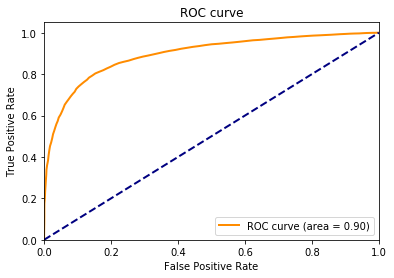

sensitivity 0.87, specificity 0.73, auc 0.9


In [49]:
two_stage_classifier = RandomForestClassifier(n_estimators = 100)
two_stage_classifier.fit(multi_train_values,two_stage_trainlabels)
sensitivity, specificity, score = run_display_output(two_stage_classifier,multi_test_values,two_stage_testlabels,DRAW=True)
print('sensitivity {}, specificity {}, auc {}'.format(sensitivity, specificity, score))